# Assignment8

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [7]:
df = pd.read_csv('/content/car_data.csv')

In [8]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [9]:
df.shape

(804, 12)

In [10]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [11]:
for i in df.columns:
    print('{} has {} missing values'.format(i,df[i].isnull().sum()))

Price has 0 missing values
Mileage has 0 missing values
Make has 0 missing values
Model has 0 missing values
Trim has 0 missing values
Type has 0 missing values
Cylinder has 0 missing values
Liter has 0 missing values
Doors has 0 missing values
Cruise has 0 missing values
Sound has 0 missing values
Leather has 0 missing values


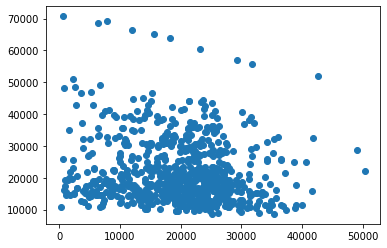

In [12]:
plt.scatter('Mileage','Price',data=df)

TypeError: ignored

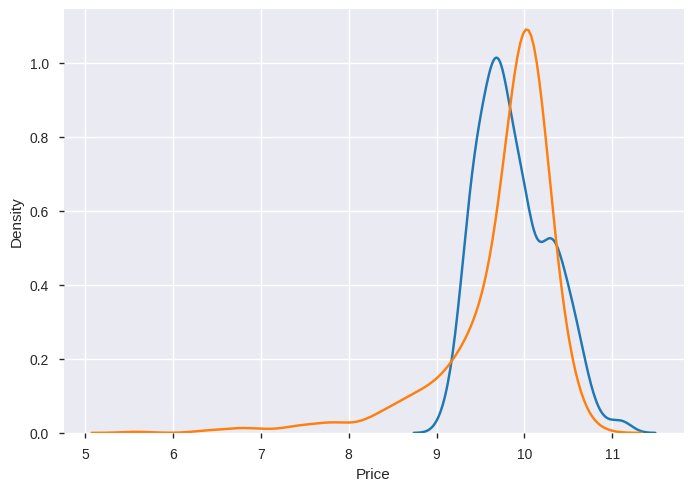

In [40]:
dflog = df.copy()
for i in dflog.columns:
  dflog[i] = np.log(dflog[i])
  sns.kdeplot(dflog[i])
  plt.show()

TypeError: ignored

In [13]:
features = df[['Mileage','Price']]

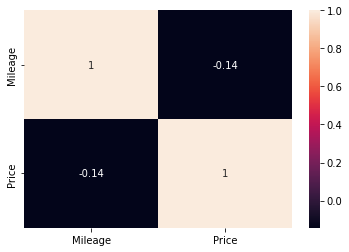

In [14]:
sns.heatmap(features.corr(),annot =True)

In [15]:
features.head()

,Mileage,Price
0,8221,17314.103129
1,9135,17542.036083
2,13196,16218.847862
3,16342,16336.913140
4,19832,16339.170324


In [16]:
x = df['Mileage']
y = df['Price']
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [19]:
tx_train = scaler.fit_transform(x_train.values.reshape(-1,1))
tx_test = scaler.transform(x_test.values.reshape(-1,1))

In [20]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [21]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
pred = model.predict(x_test.values.reshape(-1,1))

In [22]:
r2_score(y_true = y_test,y_pred = pred)

0.008523706195920244

In [23]:
model1 = SGDRegressor()
model1.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
pred1 = model1.predict(x_test.values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
r2_score(y_true = y_test,y_pred = pred1)

-4.301216838581507e+26

In [25]:
model = LinearRegression()
model.fit(tx_train,y_train.values.reshape(-1,1))
pred = model.predict(tx_test)

In [26]:
r2_score(y_true = y_test,y_pred = pred)

0.008523706195920244

### The accuracy of the model is pretty low after hyperparameter tuning 

# Task 2

In [ ]:
x = [i for i in df.columns if (df[i].dtype != 'O') and  i!='Price']
x =df[x]

In [ ]:
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
model = LinearRegression()
model.fit(x_train,y_train.values.reshape(-1,1))
pred = model.predict(x_test)

In [ ]:
r2_score(y_true = y_test,y_pred = pred)

0.45650931120272253

## The 2nd task also does not give satisfactory result 

# Task 3

In [ ]:
categorical_values = []
for i in df.columns:
  if df[i].dtype == 'O':
    categorical_values.append(i)
    print('{} have {} unique values'.format(i,df[i].nunique()))

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_values

[]

In [ ]:
encoder = LabelEncoder()

In [ ]:
for i in categorical_values:
        df[i] = encoder.fit_transform(df[i])


In [ ]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,44,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,21,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,21,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,21,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,21,3,6,3.0,4,1,1,0


In [ ]:
y = df['Price']
x = [i for i in df.columns if i!='Price']
x=df[x]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
scaler = StandardScaler()
tx_train = scaler.fit_transform(x_train)

In [ ]:
tx_test = scaler.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(tx_train,y_train)
pred = model.predict(tx_test)

In [ ]:
r2_score(y_test,pred)

0.4509340822512279